<a href="https://colab.research.google.com/github/suriya4/Dental-carries-detection-using-opencv-and-cnn/blob/main/Copy_of_Dental_Cavities_Diagnosis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab.patches import cv2_imshow
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import zipfile
import datetime

In [ ]:
!unzip -q "/content/drive/MyDrive/full teeth.zip"


In [ ]:
image_1 = cv2.imread("/content/full teeth/train/caries/10.png")

print(image_1.shape)

cv2_imshow(image_1)

(256, 256, 3)


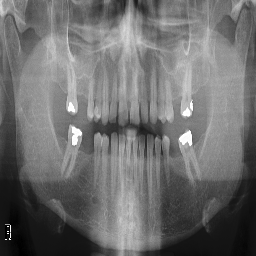

In [ ]:
# image_1_crp = image_1[:,400:1500] # we are using array indexing to crop an image

# print(image_1_crp.shape)

# cv2_imshow(image_1_crp)

image_1_resize = cv2.resize(image_1,(256,256))

print(image_1_resize.shape)

cv2_imshow(image_1_resize)

In [ ]:
from os import listdir

VAL
frame_dir = "/content/full teeth/val/non caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/val/non caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

frame_dir = "/content/full teeth/val/caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/val/caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

TRAIN
frame_dir = "/content/full teeth/train/caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/train/caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

frame_dir = "/content/full teeth/train/non caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/train/non caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

TEST
frame_dir = "/content/full teeth/test/non caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/test/non caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

frame_dir = "/content/full teeth/test/caries"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()
output_dir = "/content/drive/MyDrive/Colab Notebooks/Final IMG/test/caries"
if not os.path.exists(output_dir):
  os.mkdir(output_dir)

def crop_resize_black_img(img):
  image_1_resize = cv2.resize(img,(256,256))
  image_1_b_w = cv2.cvtColor(image_1_resize, cv2.COLOR_BGR2GRAY )
  return image_1_b_w

for image_nm in frame_dir_lst:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  img_after_preprocess = crop_resize_black_img(img)
  cv2.imwrite(os.path.join(output_dir,image_nm),img_after_preprocess)


In [ ]:
dir_path = r'/content/Final IMG/train/caries'
count = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('File count:', count)

File count: 1038


In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [ ]:
def flip_img(img):
  #image_1 = cv2.imread(img)

  image_1_flip = cv2.flip(img,3)

  cv2_imshow(image_1_flip)
  return image_1_flip

In [ ]:
frame_dir = "/content/images"
output_dir_1 = "/content/images"
output_dir_2 = "/content/images"
frame_dir_lst = os.listdir(frame_dir)

if not os.path.exists(output_dir_1):
  os.mkdir(output_dir_1)

if not os.path.exists(output_dir_2):
  os.mkdir(output_dir_2)

for image_nm in frame_dir_lst:
  #print(os.path.join(frame_dir,image_nm))
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  img1 = rotate_image(img,20)
  cv2.imwrite(os.path.join(output_dir_1,image_nm),img1)
  img2 = flip_img(img)
  cv2.imwrite(os.path.join(output_dir_2,image_nm),img2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
# !rm -r "/content/drive/MyDrive/Colab Notebooks/Final IMG/train/.ipynb_checkpoints"
# !rm -r "/content/drive/MyDrive/Colab Notebooks/Final IMG/val/.ipynb_checkpoints"
#not required

rm: cannot remove '/content/drive/MyDrive/Colab Notebooks/Final IMG/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/drive/MyDrive/Colab Notebooks/Final IMG/val/.ipynb_checkpoints': No such file or directory


In [ ]:
train = ImageDataGenerator(rescale=1./255).flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/Final IMG/train", batch_size=32, target_size=(256,256), class_mode='binary')
valid = ImageDataGenerator(rescale=1./255).flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/Final IMG/val", batch_size=32, target_size=(256,256), class_mode='binary')

Found 1060 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(256, 256, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3), padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

In [ ]:
model_fit = model.fit(train, steps_per_epoch = 34,
                     epochs = 20,
                    verbose = 1,
                     validation_data = valid)

Epoch 1/20
34/34 [==============================] - 7s 190ms/step - loss: 0.0733 - accuracy: 0.9792 - val_loss: 0.5049 - val_accuracy: 0.8103
Epoch 2/20
34/34 [==============================] - 6s 187ms/step - loss: 0.0675 - accuracy: 0.9774 - val_loss: 0.5646 - val_accuracy: 0.6466
Epoch 3/20
34/34 [==============================] - 7s 192ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.4671 - val_accuracy: 0.8103
Epoch 4/20
34/34 [==============================] - 6s 189ms/step - loss: 0.0762 - accuracy: 0.9802 - val_loss: 0.5490 - val_accuracy: 0.8017
Epoch 5/20
34/34 [==============================] - 7s 189ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.4320 - val_accuracy: 0.8103
Epoch 6/20
34/34 [==============================] - 7s 191ms/step - loss: 0.0546 - accuracy: 0.9792 - val_loss: 0.4294 - val_accuracy: 0.7931
Epoch 7/20
34/34 [==============================] - 7s 191ms/step - loss: 0.0474 - accuracy: 0.9802 - val_loss: 0.3503 - val_accuracy: 0.8362
Epoch 

In [ ]:
model.save('CAVITY_CHECK.h5')

In [ ]:
#no early stopping 

In [ ]:
image_2= cv2.imread("/content/full teeth/test/caries/10.png")

print(image_2.shape)

cv2_imshow(image_2)